# Chapter 8. Multiple Agents: Exercise

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

In [9]:
class EvoAlg:
    """A basic class of evolutionary algorithms"""

    def __init__(self, fitfun, genes, amut=0.1, pcross=0.1):
        """Create a new population
        genes: (P,C) array of int or float
        sigma: mutation size"""
        self.fitfun = fitfun   # fitness function
        self.genes = np.array(genes)  # initial genotypes
        self.P = self.genes.shape[0]  # population size
        self.C = self.genes.shape[1]  # genetic code length
        self.amut = amut  # mutation amplitude
        self.pcross = pcross  # crossover probability
        self.fits = np.zeros(self.P)  # individual fitnesses
        self.best = []    # current best solution
        self.record = []  # record of best fitness

    def evaluate(self):
        """Evaluate individuals"""
        for i, g in enumerate(self.genes):
            self.fits[i] = self.fitfun(g)
        self.best = self.genes[np.argmax(self.fits)]  # best solution
        self.record.append(max(self.fits))  # record best fitness

    def select(self):
        """Roulette selection"""
        prob = self.fits - min(self.fits)  # make sure non-negative
        prob = prob/sum(prob)  # normalize
        selected = np.zeros(self.P, dtype=int)  # indices of selected
        for i in range(self.P):
            selected[i] = list(np.random.multinomial(1,prob)).index(1) # multinulli
        self.genes = self.genes[selected]  # update the genome
            
    def crossover(self, pcross=None):
        """Point crossover"""
        if pcross is None:
            pcross = self.pcross  # use the default
        # make random pairs (assume even population)
        pairs = np.random.permutation(self.P).reshape((-1,2))
        ncross = int(self.P*pcross)  # number of crossed pairs
        for p, q in pairs[:ncross]:
            #if np.random.random() > self.pcross:
            #    break  # no crossover
            cp = np.random.randint(self.C-1) + 1  # cross point
            #print(p, q, cp)
            gene0 = np.r_[self.genes[p,:cp], self.genes[q,cp:]]
            gene1 = np.r_[self.genes[q,:cp], self.genes[p,cp:]]
            self.genes[p] = gene0
            self.genes[q] = gene1

    def mutate(self, amut=None):
        """Mutation by gaussian noise"""
        if amut is None:
            amut = self.amut  # use the default
        self.genes += amut*np.random.randn(self.P, self.C)

    def generation(self, amut=None, pcross=None):
        """One generation"""
        self.evaluate()
        self.select()
        self.crossover(pcross)
        self.mutate(amut)
        return self.fits  # fitness distribution

    def evolve(self, gen=100, amut=None, pcross=None):
        """Evolve multiple generations"""
        for t in range(gen):
            self.generation(amut, pcross)
        return self.record  # record of best fitness

In [10]:
# Example of Ex-Or neural network
def exor_net(w):
    """Fitness of 2-2-1 network to ExOr; w[9]"""
    X = np.array([[0,0], [0,1], [1,0], [1,1]])  # input
    T = np.array([0, 1, 1, 0])  # target
    w = w.reshape((3,3))  # 3 units with bias and two weights
    err = 0
    for x, t in zip(X, T):
        h = 1/(1+np.exp(-(w[:2,0] + w[:2,1:]@x)))  # hidden units
        y = w[-1,0] + np.dot(w[-1,1:],h)  # output
        err += (y - t)**2
        #print(h, y, t)
    return 1 - err  # fitness

In [11]:
# create an instance of evolving ExOr network
evexor = EvoAlg(exor_net, genes=np.random.randn(100,9), amut=0.05, pcross=0.05)

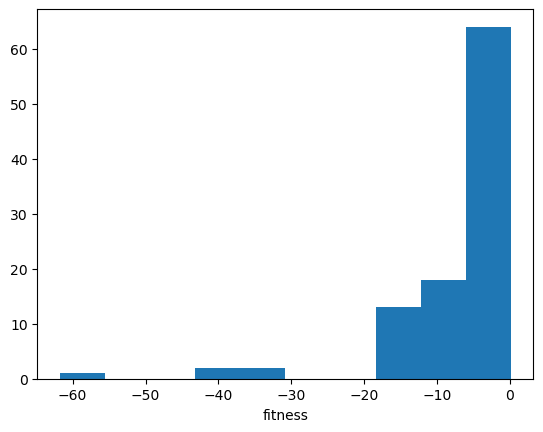

In [12]:
# Run one generation
fits = evexor.generation()
plt.hist(fits)
plt.xlabel("fitness");

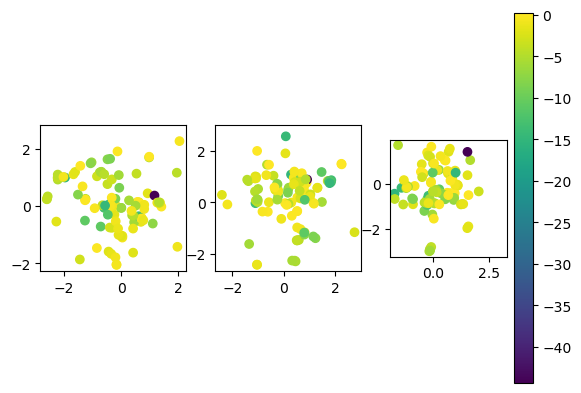

In [13]:
# Visualize weight distribution
evexor.evaluate()  # 
for i in range(3):
    plt.subplot(1,3,i+1)  # plot input weight pairs
    plt.scatter(evexor.genes[:,3*i+1], evexor.genes[:,3*i+2], c=evexor.fits);
    plt.axis('square')
plt.colorbar();

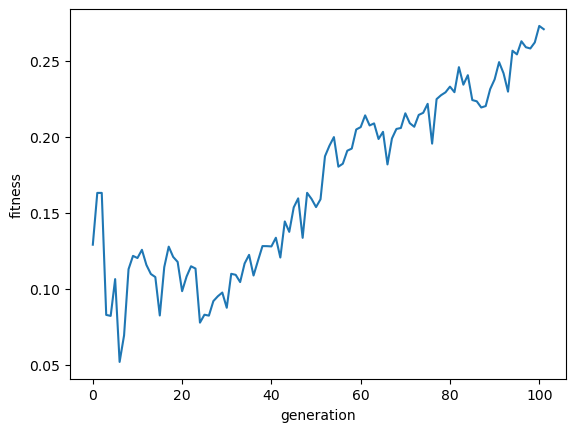

In [14]:
# Evolve generations
# You may need to run this many times, or restart if gets stuck
record = evexor.evolve(amut=0.05, pcross=0.05)
plt.plot(record)
plt.xlabel("generation"); plt.ylabel("fitness");

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise

1) Try evolutionary algorithm for an optimization of your interest while varying the methods and parameters for mutaion, crossover, and selection.

2) Model some kind of interaction between people in a game theoretic framework, define payoff matrices, and identify Nash equilibria and ESSs.

3) See how the replicator dynamics of the rock-scissors-paper game changes with the parameter $a$.